<a href="https://colab.research.google.com/github/cychen116/DataAnalysis_practice/blob/main/08_ML_LinearRegresion_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function From Scratch

In [1]:
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))

# Calculate the variance of a list of numbers 
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

from math import sqrt
def rmse(errors):
  return(sqrt(mean([float(e)**2.0 for e in errors])))

# Calculate coefficients
def fit(x,y):
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

# Sample Data Loading

In [2]:
import pandas as pd
from io import StringIO

In [3]:
data = """gender,age,volume,weight
1,1,4512,1530
1,1,3738,1297
1,1,4261,1335
1,1,3777,1282
1,1,4177,1590
1,1,3585,1300
1,1,3785,1400
1,1,3559,1255
1,1,3613,1355
1,1,3982,1375
1,1,3443,1340
1,1,3993,1380
1,1,3640,1355
1,1,4208,1522
1,1,3832,1208
1,1,3876,1405
1,1,3497,1358
1,1,3466,1292
1,1,3095,1340
1,1,4424,1400
1,1,3878,1357
1,1,4046,1287
1,1,3804,1275
1,1,3710,1270
1,1,4747,1635
1,1,4423,1505
1,1,4036,1490
1,1,4022,1485
1,1,3454,1310
1,1,4175,1420
1,1,3787,1318
1,1,3796,1432
1,1,4103,1364
1,1,4161,1405
1,1,4158,1432
1,1,3814,1207
1,1,3527,1375
1,1,3748,1350
1,1,3334,1236
1,1,3492,1250
1,1,3962,1350
1,1,3505,1320
1,1,4315,1525
1,1,3804,1570
1,1,3863,1340
1,1,4034,1422
1,1,4308,1506
1,1,3165,1215
1,1,3641,1311
1,1,3644,1300
1,1,3891,1224
1,1,3793,1350
1,1,4270,1335
1,1,4063,1390
1,1,4012,1400
1,1,3458,1225
1,1,3890,1310
1,2,4166,1560
1,2,3935,1330
1,2,3669,1222
1,2,3866,1415
1,2,3393,1175
1,2,4442,1330
1,2,4253,1485
1,2,3727,1470
1,2,3329,1135
1,2,3415,1310
1,2,3372,1154
1,2,4430,1510
1,2,4381,1415
1,2,4008,1468
1,2,3858,1390
1,2,4121,1380
1,2,4057,1432
1,2,3824,1240
1,2,3394,1195
1,2,3558,1225
1,2,3362,1188
1,2,3930,1252
1,2,3835,1315
1,2,3830,1245
1,2,3856,1430
1,2,3249,1279
1,2,3577,1245
1,2,3933,1309
1,2,3850,1412
1,2,3309,1120
1,2,3406,1220
1,2,3506,1280
1,2,3907,1440
1,2,4160,1370
1,2,3318,1192
1,2,3662,1230
1,2,3899,1346
1,2,3700,1290
1,2,3779,1165
1,2,3473,1240
1,2,3490,1132
1,2,3654,1242
1,2,3478,1270
1,2,3495,1218
1,2,3834,1430
1,2,3876,1588
1,2,3661,1320
1,2,3618,1290
1,2,3648,1260
1,2,4032,1425
1,2,3399,1226
1,2,3916,1360
1,2,4430,1620
1,2,3695,1310
1,2,3524,1250
1,2,3571,1295
1,2,3594,1290
1,2,3383,1290
1,2,3499,1275
1,2,3589,1250
1,2,3900,1270
1,2,4114,1362
1,2,3937,1300
1,2,3399,1173
1,2,4200,1256
1,2,4488,1440
1,2,3614,1180
1,2,4051,1306
1,2,3782,1350
1,2,3391,1125
1,2,3124,1165
1,2,4053,1312
1,2,3582,1300
1,2,3666,1270
1,2,3532,1335
1,2,4046,1450
1,2,3667,1310
2,1,2857,1027
2,1,3436,1235
2,1,3791,1260
2,1,3302,1165
2,1,3104,1080
2,1,3171,1127
2,1,3572,1270
2,1,3530,1252
2,1,3175,1200
2,1,3438,1290
2,1,3903,1334
2,1,3899,1380
2,1,3401,1140
2,1,3267,1243
2,1,3451,1340
2,1,3090,1168
2,1,3413,1322
2,1,3323,1249
2,1,3680,1321
2,1,3439,1192
2,1,3853,1373
2,1,3156,1170
2,1,3279,1265
2,1,3707,1235
2,1,4006,1302
2,1,3269,1241
2,1,3071,1078
2,1,3779,1520
2,1,3548,1460
2,1,3292,1075
2,1,3497,1280
2,1,3082,1180
2,1,3248,1250
2,1,3358,1190
2,1,3803,1374
2,1,3566,1306
2,1,3145,1202
2,1,3503,1240
2,1,3571,1316
2,1,3724,1280
2,1,3615,1350
2,1,3203,1180
2,1,3609,1210
2,1,3561,1127
2,1,3979,1324
2,1,3533,1210
2,1,3689,1290
2,1,3158,1100
2,1,4005,1280
2,1,3181,1175
2,1,3479,1160
2,1,3642,1205
2,1,3632,1163
2,2,3069,1022
2,2,3394,1243
2,2,3703,1350
2,2,3165,1237
2,2,3354,1204
2,2,3000,1090
2,2,3687,1355
2,2,3556,1250
2,2,2773,1076
2,2,3058,1120
2,2,3344,1220
2,2,3493,1240
2,2,3297,1220
2,2,3360,1095
2,2,3228,1235
2,2,3277,1105
2,2,3851,1405
2,2,3067,1150
2,2,3692,1305
2,2,3402,1220
2,2,3995,1296
2,2,3318,1175
2,2,2720,955
2,2,2937,1070
2,2,3580,1320
2,2,2939,1060
2,2,2989,1130
2,2,3586,1250
2,2,3156,1225
2,2,3246,1180
2,2,3170,1178
2,2,3268,1142
2,2,3389,1130
2,2,3381,1185
2,2,2864,1012
2,2,3740,1280
2,2,3479,1103
2,2,3647,1408
2,2,3716,1300
2,2,3284,1246
2,2,4204,1380
2,2,3735,1350
2,2,3218,1060
2,2,3685,1350
2,2,3704,1220
2,2,3214,1110
2,2,3394,1215
2,2,3233,1104
2,2,3352,1170
2,2,3391,1120"""

In [4]:
df = pd.read_csv(StringIO(data))

In [5]:
m = mean(df['volume'])
v = variance(df['volume'], m)
(m,v)

(3633.9915611814345, 31486153.983122338)

In [6]:
x = df['volume']
y = df['weight']
mean_x = mean(x)
mean_y = mean(y)
covariance(x, mean_x, y, mean_y)

8294376.74683544

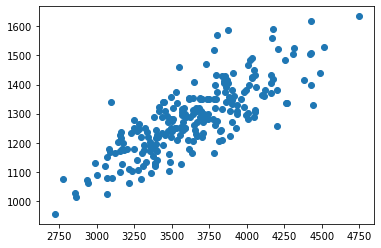

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

# Fitting / Training a model

In [9]:
(b1,b2) = fit(x, y)
print(b1,b2)

325.57342104944223 0.26342933948939945


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [11]:
model = fit(x, y)

In [12]:
def perdict(x, model):
  return (model[0]+model[1]*x)

# Model Evaluation

In [13]:
errors = perdict(X_test, model) - y_test

In [14]:
errors.describe()

count     79.000000
mean      -0.399668
std       63.355584
min     -199.779282
25%      -29.366087
50%        0.665057
75%       26.573966
max      139.044093
dtype: float64

In [15]:
from math import sqrt
def rmse(errors):
  return (sqrt(mean([float(e)**2.0 for e in errors])))

In [16]:
rmse(errors)

62.954590611491085

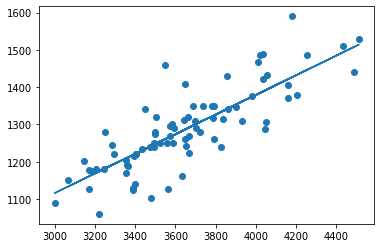

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, perdict(X_test, model))

## Compare with sklearn package

In [18]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame(X_train), pd.DataFrame(y_train))

LinearRegression()

In [19]:
model2 = [reg.intercept_[0], reg.coef_[0]]
model2

[339.3581378068179, array([0.25957357])]

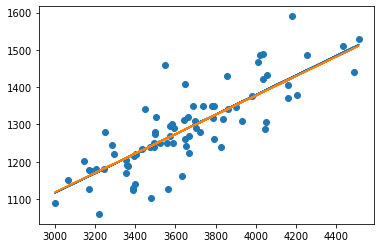

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, perdict(X_test, model))
plt.plot(X_test, perdict(X_test, model2))

In [21]:
rmse(y_test-perdict(X_test, model2))

63.03734093019323

In [22]:
df.describe()

,gender,age,volume,weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


## Model Adjustment

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df[['gender','age','volume']], df['weight'], test_size = 0.33)

In [24]:
reg2 = linear_model.LinearRegression()
reg2.fit(pd.DataFrame(X_train), pd.DataFrame(y_train))

LinearRegression()

In [25]:
pred = reg2.predict(X_test)
ps = pd.Series([p[0] for p in pred])

In [26]:
err = pd.Series(y_test)-[p[0] for p in pred]
rmse(err)

70.69827707518903

# Advanced Model Building

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [28]:
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15, 32, 64]

In [29]:
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.rand(n_samples)

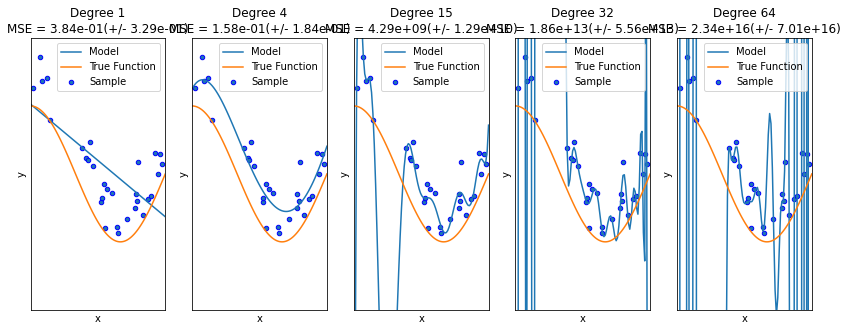

In [30]:
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  polynomial_features = PolynomialFeatures(degree=degrees[i],
                                           include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X[:, np.newaxis], y)

  # Evaluate the models using crossvalidation
  scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                           scoring='neg_mean_squared_error', cv=10)
  
  X_test = np.linspace(0, 1, 100)
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  plt.plot(X_test, true_fun(X_test), label='True Function')
  plt.scatter(X, y, edgecolors='b', s=20, label='Sample')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(
      degrees[i], -scores.mean(), scores.std()))
  
plt.show()